# The Fashion MNIST dataset

Tutorial source: https://www.tensorflow.org/tutorials/keras/classification

Convolutional Neural Networks: https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

The Fashion MNIST dataset is a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

**Label:**	**Class**

0:    T-shirt/top

1:    Trouser

2:    Pullover

3:    Dress

4:    Coat

5:    Sandal

6:    Shirt

7:    Sneaker

8:    Bag

9:    Ankle boot

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploration

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# The convolutional layer will need the input to have 4 dimensions
# (info about how many channels the images have: in our case, just 1)
train_images=train_images.reshape(60000, 28, 28, 1)
train_images.shape

test_images=test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that it is a boot represented in a scale of grays:

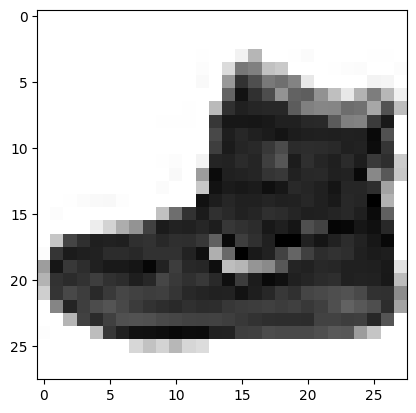

In [ ]:
item = train_images[0]
plt.imshow(item, cmap=plt.cm.binary)
plt.show()

The pixel values fall in the range of 0 to 255:

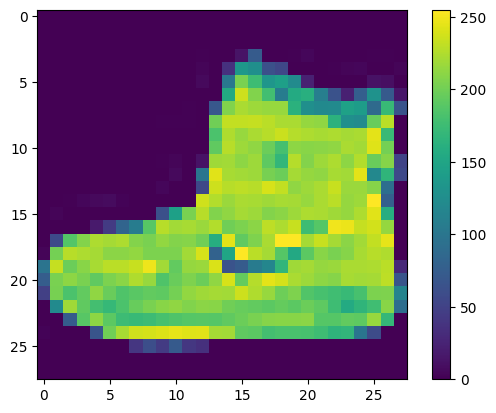

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

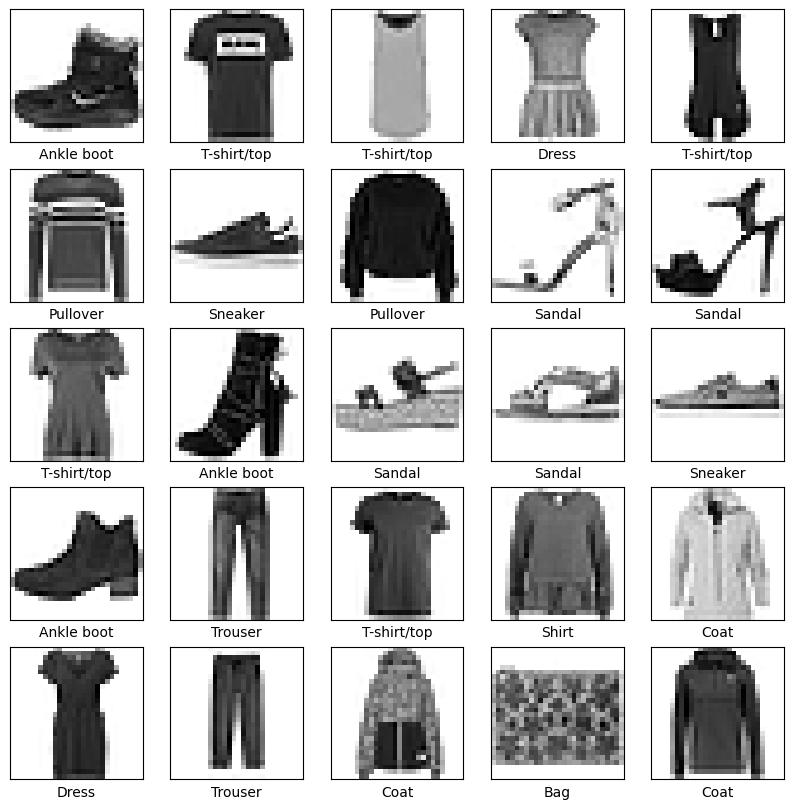

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



Build a simple Sequential neural network that classifies the images.



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 3.2713 - accuracy: 0.7003
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6794 - accuracy: 0.7616
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5950 - accuracy: 0.7875
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5510 - accuracy: 0.8057
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5200 - accuracy: 0.8191
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5052 - accuracy: 0.8261
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4827 - accuracy: 0.8323
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4744 - accuracy: 0.8385
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4762 - accuracy: 0.8372
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.46

In [ ]:
test_results = {}

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

test_results["nn_model"] = test_acc*100

test_results

{'nn_model': 82.0900022983551}

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 1s 3ms/step


array([1.1207113e-15, 9.9851911e-15, 0.0000000e+00, 3.3403660e-16,
       6.7751133e-32, 7.3570937e-02, 2.5324014e-23, 2.1763432e-01,
       3.7742592e-16, 7.0879483e-01], dtype=float32)

In [ ]:
print(np.argmax(predictions[0]))
print(test_labels[0])


9
9


### Verifying predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

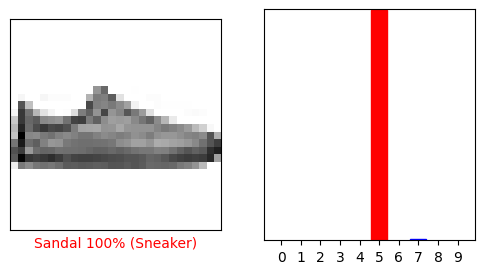

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

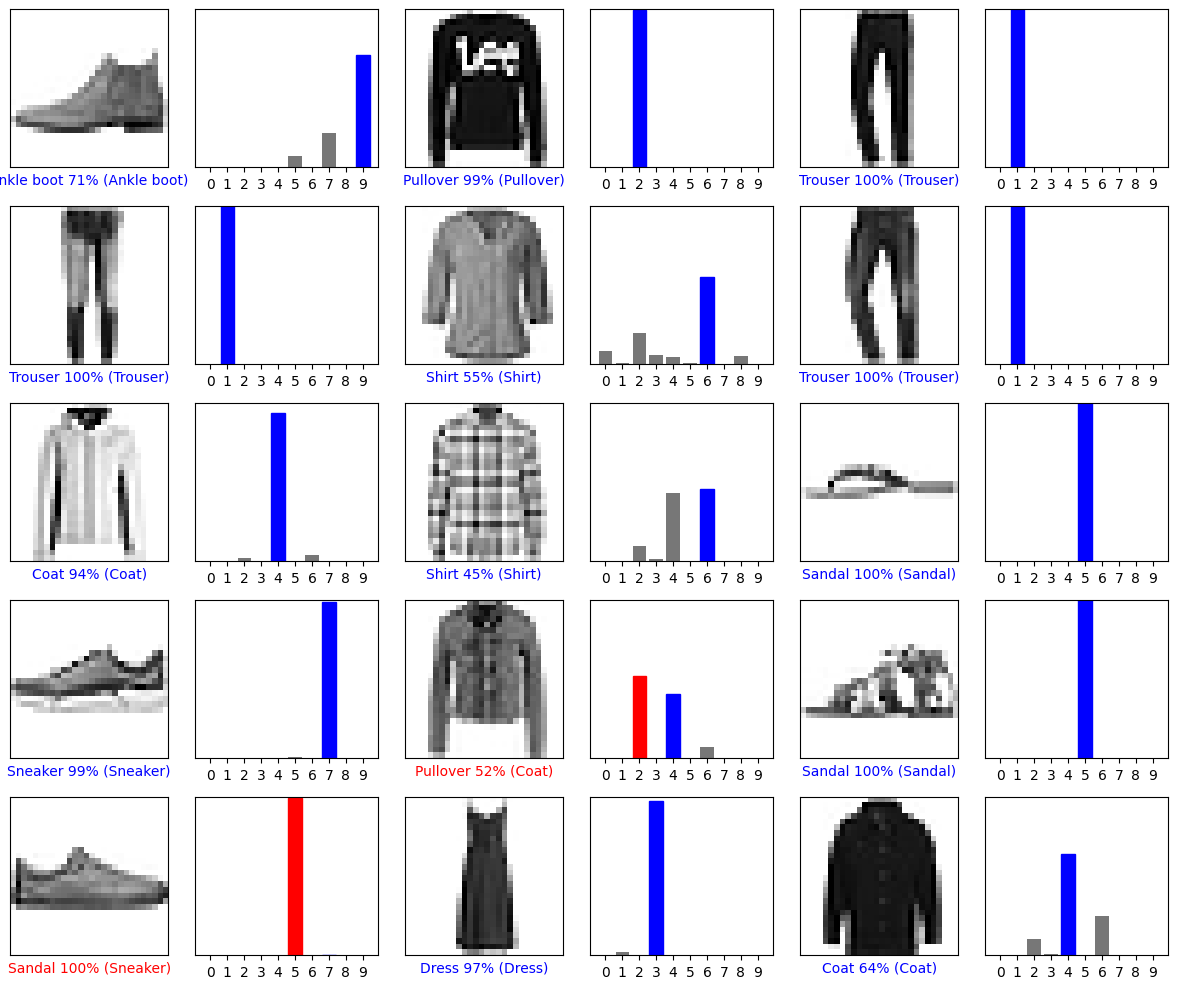

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Adding Convolutions and Pooling

In [ ]:
# challenge:

# add a tf.keras.layers.Conv2D and a tf.keras.layers.MaxPooling2D layer to the model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
# Create a sequential model
model = Sequential()

# add a conv layer with 32 filters each with 3 * 3 size
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# add pool layer
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10))


In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 5408)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                346176    
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_______________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.9820 - accuracy: 0.8079
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3283 - accuracy: 0.8830
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2799 - accuracy: 0.8982
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2546 - accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2337 - accuracy: 0.9123
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2187 - accuracy: 0.9183
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2025 - accuracy: 0.9235
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1909 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1755 - accuracy: 0.9347
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [ ]:
# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

test_results["nn_model with convolution layer and maxpool"] = test_acc*100

test_results

{'nn_model': 82.0900022983551,
 'nn_model with convolution layer and maxpool': 88.95000219345093}

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions_2 = probability_model.predict(test_images)


313/313 [==============================] - 3s 8ms/step


# verify predictions: use already defined functions  plot_image() and plot_value_array() from above .

### just check for one input image whether it was predicted correctly or not

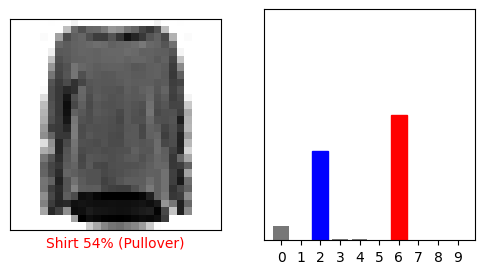

In [ ]:
i = 9362
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_2[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_2[i],  test_labels)
plt.show()

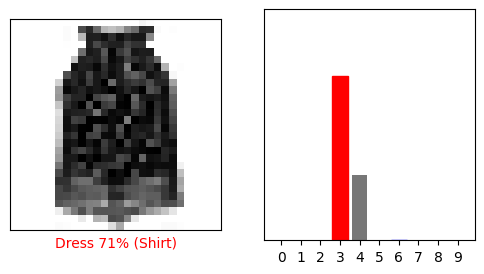

In [ ]:
i = 8202
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_2[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_2[i],  test_labels)
plt.show()

## Adding more convolutions and more pooling

In [ ]:
# challenge:

# add a 2 additional tf.keras.layers.Conv2D and tf.keras.layers.MaxPooling2D layers to the model

In [ ]:
# Create a sequential model
model = Sequential()

# add a conv layer with 32 filters each with 3 * 3 size
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

#add pool layer
model.add(MaxPooling2D((2, 2)))

# add a conv layer with 20 filters each with 3 * 3 size
model.add(Conv2D(20, (3, 3), activation='relu'))

# add pool layer
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.5806 - accuracy: 0.8092
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3578 - accuracy: 0.8675
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3183 - accuracy: 0.8816
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2909 - accuracy: 0.8909
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2733 - accuracy: 0.8968
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2578 - accuracy: 0.9024
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2448 - accuracy: 0.9082
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2309 - accuracy: 0.9131
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2197 - accuracy: 0.9173
Epoch 10/10
1875/1875 [==============================] - 49s 26m

In [ ]:
# Evaluate the model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

test_results["nn_model with 2 (convolution layer + maxpool) layers"] = test_acc*100

test_results

{'nn_model': 82.0900022983551,
 'nn_model with convolution layer and maxpool': 88.95000219345093,
 'nn_model with 2 (convolution layer + maxpool) layers': 88.9299988746643}